### Importing libraries

In [80]:
import os
import h5py
import torch
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Load data

In [81]:
if os.getlogin() == 'johandybkjaer-knudsen':
    file_dir = '/Volumes/U/G2.h5'
elif os.getlogin() == 'suneetsingh':
    file_dir = '/Volumes/VERBATIM HD/Deep learning data/G2.h5'
    
data = h5py.File(file_dir, 'r')

### Get overview of data

In [82]:
# Data structure
print("The data contains the following folders: {}".format(list(data.keys())))
print('Shape "b_": {}'.format(data['b_'].shape))
print('Shape "ih": {}'.format(data['ih'].shape))
print('Shape "ih_mean": {}'.format(data['ih_mean'].shape))

The data contains the following folders: ['b_', 'ih', 'ih_mean']
Shape "b_": (78979, 1, 128, 128)
Shape "ih": (78979, 3, 128, 128)
Shape "ih_mean": (3, 128, 128)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


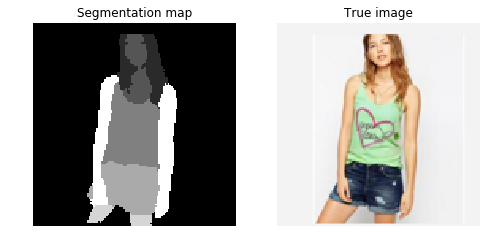

In [117]:
# ----- Plot example of data -----
randNum = np.random.randint(len(data['ih']))
img_mean = data['ih_mean']

# Example of grey-scale image
img_grey = data['b_'][randNum][0].T

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.title('Segmentation map')
plt.axis('off')
plt.imshow(img_grey, cmap='gray')

# Example of color image
img_color = data['ih'][randNum] + img_mean
img_color = img_color.T
img_color = torch.from_numpy(img_color)

plt.subplot(122)
plt.title('True image')
plt.axis('off')
plt.imshow(img_color)

plt.show()

### Segmentation

In [88]:
np.unique(img_grey)

array([0, 1, 2, 3, 5, 6], dtype=uint8)

In [89]:
img_grey.shape

(128, 128)